In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('/content/parking_data_9000.csv')
df

,ParkingID,VehicleType,EntryTime,ExitTime,ParkingFee,Floor,SlotNumber,IsReserved,Violations
0,1,Truck,2023-11-28 09:30:00,2023-11-28 11:57:00,128.76,1,7,1,0
1,2,SUV,2023-06-24 15:57:00,2023-06-24 18:52:00,158.72,4,22,1,1
2,3,Car,2023-02-15 07:31:00,2023-02-15 08:34:00,67.00,1,10,1,1
3,4,Truck,2023-04-29 14:28:00,2023-04-29 17:23:00,136.77,2,23,0,1
4,5,Truck,2023-03-19 09:02:00,2023-03-19 11:18:00,215.31,1,15,0,2
...,...,...,...,...,...,...,...,...,...
8995,8996,SUV,2023-08-22 06:54:00,2023-08-22 10:45:00,238.28,3,1,1,2
8996,8997,Car,2023-09-01 03:41:00,2023-09-01 06:06:00,201.23,5,21,1,0
8997,8998,Bike,2023-07-18 11:25:00,2023-07-18 11:43:00,22.59,4,25,1,2
8998,8999,Car,2023-12-19 22:54:00,2023-12-20 02:50:00,349.70,3,32,1,1


In [ ]:
df.shape

(9000, 9)

In [ ]:
df.head()

,ParkingID,VehicleType,EntryTime,ExitTime,ParkingFee,Floor,SlotNumber,IsReserved,Violations
0,1,Truck,2023-11-28 09:30:00,2023-11-28 11:57:00,128.76,1,7,1,0
1,2,SUV,2023-06-24 15:57:00,2023-06-24 18:52:00,158.72,4,22,1,1
2,3,Car,2023-02-15 07:31:00,2023-02-15 08:34:00,67.00,1,10,1,1
3,4,Truck,2023-04-29 14:28:00,2023-04-29 17:23:00,136.77,2,23,0,1
4,5,Truck,2023-03-19 09:02:00,2023-03-19 11:18:00,215.31,1,15,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ParkingID    9000 non-null   int64  
 1   VehicleType  9000 non-null   object 
 2   EntryTime    9000 non-null   object 
 3   ExitTime     9000 non-null   object 
 4   ParkingFee   9000 non-null   float64
 5   Floor        9000 non-null   int64  
 6   SlotNumber   9000 non-null   int64  
 7   IsReserved   9000 non-null   int64  
 8   Violations   9000 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 632.9+ KB


In [ ]:
df.describe()

,ParkingID,ParkingFee,Floor,SlotNumber,IsReserved,Violations
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4500.500000,157.758677,2.994111,25.374778,0.496667,1.001889
std,2598.220545,101.759052,1.421451,14.522197,0.500017,0.822168
min,1.000000,7.640000,1.000000,1.000000,0.000000,0.000000
25%,2250.750000,76.070000,2.000000,13.000000,0.000000,0.000000
50%,4500.500000,136.925000,3.000000,25.000000,0.000000,1.000000
75%,6750.250000,223.407500,4.000000,38.000000,1.000000,2.000000
max,9000.000000,474.630000,5.000000,50.000000,1.000000,2.000000


In [ ]:
df.isnull().sum()

,0
ParkingID,0
VehicleType,0
EntryTime,0
ExitTime,0
ParkingFee,0
Floor,0
SlotNumber,0
IsReserved,0
Violations,0


In [ ]:
df=df.fillna(method="bfill")
df=df.fillna(method="ffill")
df

<ipython-input-55-6f35b67a211f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="bfill")
<ipython-input-55-6f35b67a211f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="ffill")


,ParkingID,VehicleType,EntryTime,ExitTime,ParkingFee,Floor,SlotNumber,IsReserved,Violations
0,1,Truck,2023-11-28 09:30:00,2023-11-28 11:57:00,128.76,1,7,1,0
1,2,SUV,2023-06-24 15:57:00,2023-06-24 18:52:00,158.72,4,22,1,1
2,3,Car,2023-02-15 07:31:00,2023-02-15 08:34:00,67.00,1,10,1,1
3,4,Truck,2023-04-29 14:28:00,2023-04-29 17:23:00,136.77,2,23,0,1
4,5,Truck,2023-03-19 09:02:00,2023-03-19 11:18:00,215.31,1,15,0,2
...,...,...,...,...,...,...,...,...,...
8995,8996,SUV,2023-08-22 06:54:00,2023-08-22 10:45:00,238.28,3,1,1,2
8996,8997,Car,2023-09-01 03:41:00,2023-09-01 06:06:00,201.23,5,21,1,0
8997,8998,Bike,2023-07-18 11:25:00,2023-07-18 11:43:00,22.59,4,25,1,2
8998,8999,Car,2023-12-19 22:54:00,2023-12-20 02:50:00,349.70,3,32,1,1


## 3. Training & Testing

In [ ]:
le = LabelEncoder()
df['VehicleType'] = le.fit_transform(df['VehicleType'])

X = df.drop('ParkingFee', axis=1)
y = df['ParkingFee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Exploratory Data Analysis (EDA)

In [ ]:
df.corr()

,ParkingID,VehicleType,ParkingFee,Floor,SlotNumber,IsReserved,Violations,Duration
ParkingID,1.000000,0.016485,-0.009870,0.017260,0.014650,-0.000934,0.006535,-0.019322
VehicleType,0.016485,1.000000,-0.017077,0.025316,0.001745,-0.004776,-0.022883,-0.017686
ParkingFee,-0.009870,-0.017077,1.000000,0.006387,0.009566,-0.001937,-0.023611,0.797596
Floor,0.017260,0.025316,0.006387,1.000000,-0.002213,0.005054,-0.001797,0.009422
SlotNumber,0.014650,0.001745,0.009566,-0.002213,1.000000,-0.014557,-0.020498,0.013025
IsReserved,-0.000934,-0.004776,-0.001937,0.005054,-0.014557,1.000000,0.006638,0.017858
Violations,0.006535,-0.022883,-0.023611,-0.001797,-0.020498,0.006638,1.000000,-0.010061
Duration,-0.019322,-0.017686,0.797596,0.009422,0.013025,0.017858,-0.010061,1.000000


## 5. ML Models

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 7. Dimensionality Reduction using PCA

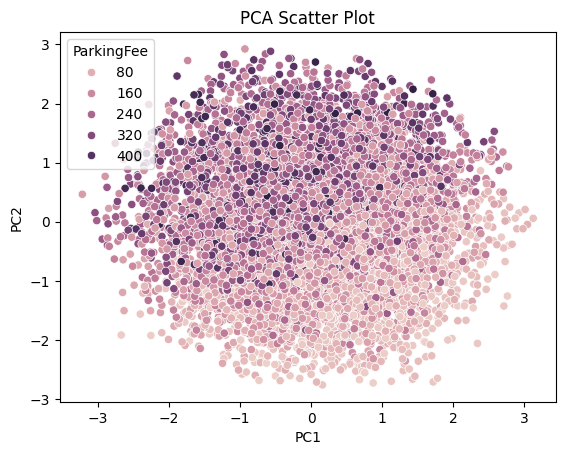

In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
X_pca_df['ParkingFee'] = y
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='ParkingFee')
plt.title("PCA Scatter Plot")
plt.show()

## 8. Regularization

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6269195537509789

## 9. y = mx + b -> Slope and Intercept

In [ ]:
print(f'Slope (m): {model.coef_}')
print(f'Intercept (b): {model.intercept_}')

Slope (m): [ 1.35149661e-04 -4.17812491e-01  3.01014901e-02 -4.81953793e-02
 -3.33528317e+00 -1.99410242e+00  1.25058970e+00]
Intercept (b): 3.955615021738822


## 10. XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.5481833056694403

## 11. RMSE, MSE, R^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

MSE: 3928.633964563536, RMSE: 62.67881591545533, R^2: 0.6269195047136771


## 12. Gradient Descent

In [ ]:
# Demonstration using SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

-1.492284356115505e+28

## 13. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.63409048 0.62964963 0.64874843 0.62680251 0.64002818]


## 14. Correlation & Covariance

In [ ]:
df.corr()
df.cov()

,ParkingID,VehicleType,ParkingFee,Floor,SlotNumber,IsReserved,Violations,Duration
ParkingID,6.750750e+06,47.697744,-2609.558375,63.745472,552.782031,-1.213913,13.959273,-3255.752528
VehicleType,4.769774e+01,1.240133,-1.935127,0.040073,0.028226,-0.002660,-0.020951,-1.277267
ParkingFee,-2.609558e+03,-1.935127,10354.904760,0.923917,14.136727,-0.098539,-1.975331,5263.573051
Floor,6.374547e+01,0.040073,0.923917,2.020523,-0.045687,0.003592,-0.002100,0.868555
SlotNumber,5.527820e+02,0.028226,14.136727,-0.045687,210.894197,-0.105707,-0.244735,12.266831
IsReserved,-1.213913e+00,-0.002660,-0.098539,0.003592,-0.105707,0.250017,0.002729,0.579085
Violations,1.395927e+01,-0.020951,-1.975331,-0.002100,-0.244735,0.002729,0.675960,-0.536427
Duration,-3.255753e+03,-1.277267,5263.573051,0.868555,12.266831,0.579085,-0.536427,4205.802250


## 15. EDA using Visualization

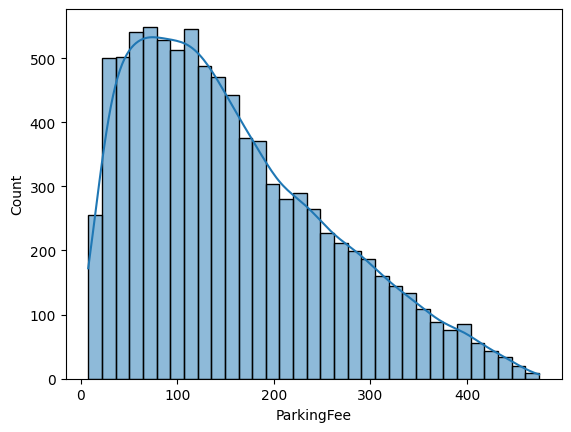

In [ ]:


# Univariate
sns.histplot(df['ParkingFee'], kde=True)
plt.show()


plt.show()

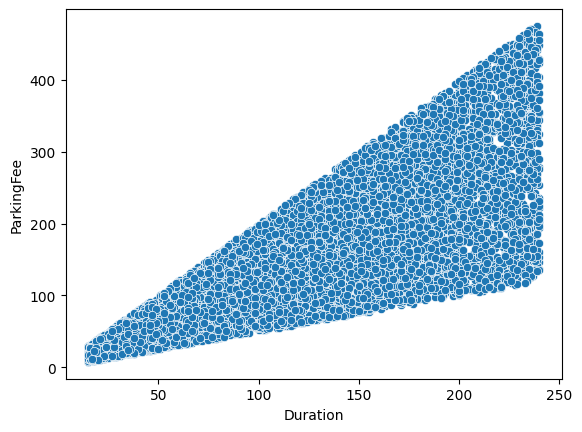

In [ ]:
# Bivariate
sns.scatterplot(data=df, x='Duration', y='ParkingFee')
plt.show()

<Figure size 1200x1000 with 0 Axes>

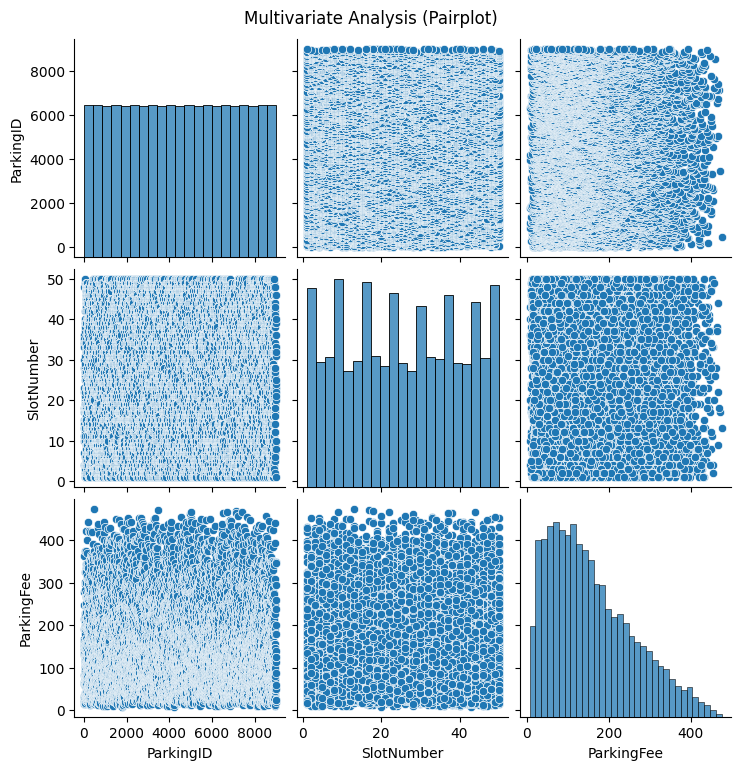

In [ ]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['ParkingID', 'SlotNumber', 'ParkingFee']])
plt.suptitle("Multivariate Analysis (Pairplot)", y=1.02)
plt.show()


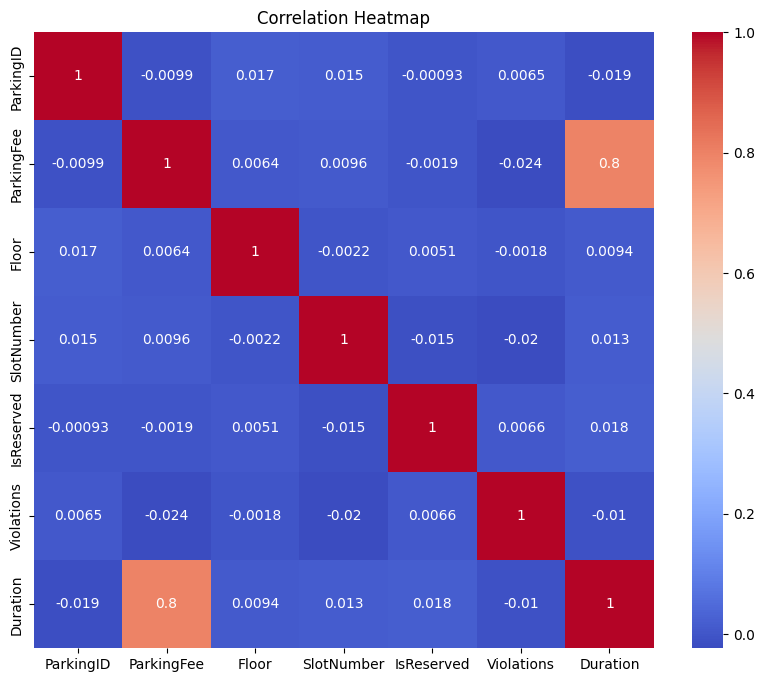

In [ ]:
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#

accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model: {accuracy:.2f}%")


Accuracy of the model: 62.69%
